In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('Spam SMS Collection', sep='\t', names=['label','message'])

In [8]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
df.columns

Index(['label', 'message'], dtype='object')

In [10]:
df.shape

(5572, 2)

In [14]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

# so we can also visualize this thing also.

In [15]:
labels = df['label'].value_counts()

Text(0.5, 1.0, 'Spam Sms Classification')

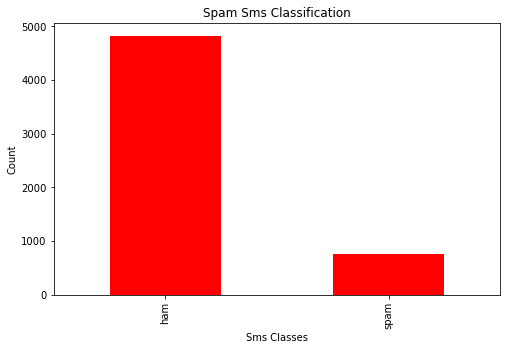

In [27]:
plt.figure(figsize=(8,5))
labels.plot(kind='bar', color='red');
plt.xlabel("Sms Classes")
plt.ylabel("Count")
plt.title('Spam Sms Classification')

# Data Cleaning And PreProcessing 

In [28]:
# Importing essential libraries for natural language processing

In [30]:
import nltk
import re

In [36]:
import sys
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\syedh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
df.shape[0]

5572

In [43]:
# Thats why we use the df.shape is in loop, to reach the total messages.
corpus = []
ps = PorterStemmer()

for i in range(0,df.shape[0]):
    
    
    #cleaning special character from the message
    message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df.message[i])
    
    message = message.lower()
    words=message.split()
    
    words = [word for word in words if word not in set(stopwords.words('english'))]

    words = [ps.stem(word) for word in words]
    
    message = ' '.join(words)
    
    corpus.append(message)

In [44]:
corpus[0:10]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free']

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [47]:
y = pd.get_dummies(df['label'])

In [52]:
y = y.iloc[:,1].values

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [53]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

# Model Building 

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [56]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [58]:
y_pred = classifier.predict(x_test)

In [59]:
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=uint8)

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [61]:
score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)

In [62]:
score1

0.9856502242152466

In [63]:
score2

0.9444444444444444

In [64]:
score3

0.95625

In [67]:
print("Accuracy score is {}:".format(round(score1*100,2)))

Accuracy score is 98.57:


In [68]:
# Making the cofussion Matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)

In [69]:
cm

array([[946,   9],
       [  7, 153]], dtype=int64)

Text(69.0, 0.5, 'Actual Value')

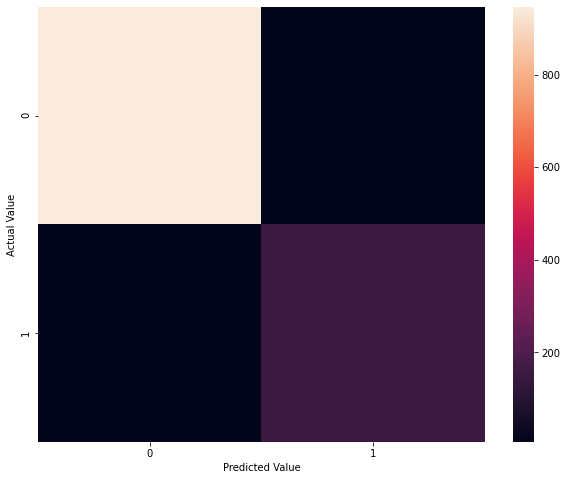

In [72]:
# Plotting the confussion matrix
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(cm);
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

# Predictions 

In [75]:
def predict_spam(message):
  message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = message)
  message = sample_message.lower()
  message_words = message.split()
  message_words = [word for word in message_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_message = [ps.stem(word) for word in message_words]
  final_message = ' '.join(final_message)

  temp = cv.transform([final_message]).toarray()
  return classifier.predict(temp)

In [76]:
# Predicting values
sample_message = 'IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.'

if predict_spam(sample_message):
  print('This is a SPAM message!')
else:
  print('This is a normal message.')

This is a SPAM message!


In [78]:
# Predicting values
sample_message = 'Hello! How are you doing today.'

if predict_spam(sample_message):
  print('This is a SPAM message!')
else:
  print('This is a normal message.')

This is a normal message.


In [79]:
# Predicting values
sample_message = 'Yar kdr ja ray ho? Project ka kya kiya ha?'

if predict_spam(sample_message):
  print('This is a SPAM message!')
else:
  print('This is a normal message.')

This is a normal message.
